<a id=libraries></a>
<h3 style="color:#4682B4">Import libraries and packages</h3>
<a href='#top'>🔼</a>

In [32]:
# ===================================================
# this will help in making the Python code more
# structured automatically (good coding practice)
from IPython import get_ipython

ipython = get_ipython()

if "nb_black" not in ipython.extension_manager.loaded:
    %load_ext nb_black
# ====================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# handling dates and times
import datetime

# to do mathematical computations
import math

# a library for visualizing missing data can be very helpful when trying to understand the 'shape' of missing data.
import missingno as msno

# used for regular expressions, which can be very useful when cleaning text data
import re

# scikit-learn has a number of preprocessing functions that can scaling and normalizing data or encoding categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

## Create a function to display side by side
from IPython.display import display_html


def display_side_by_side(*args):
    html_str = ""
    for df in args:
        html_str += df.to_html() + "&nbsp;&nbsp;&nbsp;"
    display_html(html_str.replace("table", 'table style="display:inline"'), raw=True)


# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<h3 style="color:#4682B4">Load the dataframes</h3>

In [33]:
# read the orders.cleaned pickle file
# read the returns.cleaned pickle file
orders_cleaned = pd.read_pickle("../data/orders_cleaned.pkl")
returns_cleaned = pd.read_pickle("../data/returns_cleaned.pkl")

# read the orders.scaled pickle file
# read the returns.scaled pickle file
orders_scaled = pd.read_pickle("../data/orders_scaled.pkl")
returns_scaled = pd.read_pickle("../data/returns_scaled.pkl")

<IPython.core.display.Javascript object>

In [34]:
print("Shape of orders_cleaned: ", orders_cleaned.shape)
print("Shape of orders_scaled: ", orders_scaled.shape)
print("Shape of returns_cleaned: ", returns_cleaned.shape)
print("Shape of returns_scaled: ", returns_scaled.shape)

Shape of orders_cleaned:  (24059, 43)
Shape of orders_scaled:  (24059, 43)
Shape of returns_cleaned:  (1208, 23)
Shape of returns_scaled:  (1208, 23)


<IPython.core.display.Javascript object>

In [35]:
orders_cleaned.head()

,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Order_Month_April,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_March,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September,Ship_Mode_First Class,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Orders_Category_Furniture,Orders_Category_Office Supplies,Orders_Category_Technology,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Michigan,State_Minnesota,State_Missouri,State_Nebraska,State_North Dakota,State_Oklahoma,State_South Dakota,State_Texas,State_Wisconsin,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,11.43,3.43,0.33,0.096210,1,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,141.60,42.48,0.28,0.006591,1,0.35,1,1488,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [36]:
orders_scaled.head()

,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Order_Month_April,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_March,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September,Ship_Mode_First Class,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Orders_Category_Furniture,Orders_Category_Office Supplies,Orders_Category_Technology,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Michigan,State_Minnesota,State_Missouri,State_Nebraska,State_North Dakota,State_Oklahoma,State_South Dakota,State_Texas,State_Wisconsin,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-0.242189,-0.326292,2.776818,-0.207159,-0.224459,-0.302747,-0.29064,-0.235578,-0.273463,-0.389061,-0.367377,-0.351674,-0.222717,-0.515813,1.383391,-0.815465,-0.487837,-1.259426,2.035438,-0.520653,3.705807,-0.124288,-0.097813,-0.338322,-0.196222,-0.169381,-0.138995,-0.069906,-0.179748,-0.075677,-0.842009,-0.231421,0.985352,-0.644517,-0.498649
1,-0.524585,-0.487015,-0.016430,0.312698,-1.074842,1.027699,1.055268,0.0,-0.242189,-0.326292,2.776818,-0.207159,-0.224459,-0.302747,-0.29064,-0.235578,-0.273463,-0.389061,-0.367377,-0.351674,-0.222717,-0.515813,1.383391,-0.815465,-0.487837,0.794012,-0.491295,-0.520653,-0.269847,-0.124288,-0.097813,-0.338322,-0.196222,-0.169381,-0.138995,-0.069906,-0.179748,-0.075677,1.187636,-0.231421,0.985352,-0.644517,-0.498649
2,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-0.242189,-0.326292,2.776818,-0.207159,-0.224459,-0.302747,-0.29064,-0.235578,-0.273463,-0.389061,-0.367377,-0.351674,-0.222717,-0.515813,1.383391,-0.815465,-0.487837,-1.259426,2.035438,-0.520653,-0.269847,8.045805,-0.097813,-0.338322,-0.196222,-0.169381,-0.138995,-0.069906,-0.179748,-0.075677,-0.842009,-0.231421,0.985352,-0.644517,-0.498649
3,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-0.242189,-0.326292,2.776818,-0.207159,-0.224459,-0.302747,-0.29064,-0.235578,-0.273463,-0.389061,-0.367377,-0.351674,-0.222717,-0.515813,1.383391,-0.815465,-0.487837,-1.259426,2.035438,1.920664,-0.269847,-0.124288,-0.097813,-0.338322,-0.196222,-0.169381,-0.138995,-0.069906,-0.179748,-0.075677,-0.842009,-0.231421,0.985352,-0.644517,-0.498649
4,0.596152,-0.409288,-0.017721,-0.006969,-1.074842,0.660843,1.055268,0.0,-0.242189,-0.326292,-0.360124,-0.207159,-0.224459,-0.302747,-0.29064,-0.235578,-0.273463,2.570289,-0.367377,-0.351674,-0.222717,-0.515813,1.383391,-0.815465,-0.487837,0.794012,-0.491295,-0.520653,-0.269847,-0.124288,-0.097813,-0.338322,5.096271,-0.169381,-0.138995,-0.069906,-0.179748,-0.075677,-0.842009,-0.231421,0.985352,-0.644517,-0.498649


<IPython.core.display.Javascript object>

In [37]:
returns_cleaned.head()

,Returns_Sales,Returns_Profit,Returns_Profit_Margin,Returns_Category_Furniture,Returns_Category_Office Supplies,Returns_Category_Technology,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Michigan,State_Minnesota,State_Missouri,State_Nebraska,State_North Dakota,State_Oklahoma,State_South Dakota,State_Texas,State_Wisconsin,Reason_Returned_Not Given,Reason_Returned_Not Needed,Reason_Returned_Wrong Color,Reason_Returned_Wrong Item
0,77.26,25.4958,0.33000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,130.32,0.0000,0.00000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,92.88,9.2880,0.10000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,130.32,0.0000,0.00000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,130.32,51.8400,0.39779,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


<IPython.core.display.Javascript object>

In [38]:
returns_scaled.head()

,Returns_Sales,Returns_Profit,Returns_Profit_Margin,Returns_Category_Furniture,Returns_Category_Office Supplies,Returns_Category_Technology,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Michigan,State_Minnesota,State_Missouri,State_Nebraska,State_North Dakota,State_Oklahoma,State_South Dakota,State_Texas,State_Wisconsin,Reason_Returned_Not Given,Reason_Returned_Not Needed,Reason_Returned_Wrong Color,Reason_Returned_Wrong Item
0,-0.516542,-0.395792,0.818927,-0.5237,0.819034,-0.478426,1.868343,-0.298780,-0.095863,-0.095863,-0.318096,-0.209951,-0.187438,-0.139317,-0.057639,-0.192119,-0.08165,-0.813402,-0.220479,1.340260,-0.397741,-0.432019,-0.731398
1,-0.444612,-0.502828,-1.293266,-0.5237,0.819034,-0.478426,-0.535234,3.346942,-0.095863,-0.095863,-0.318096,-0.209951,-0.187438,-0.139317,-0.057639,-0.192119,-0.08165,-0.813402,-0.220479,1.340260,-0.397741,-0.432019,-0.731398
2,-0.495367,-0.463835,-0.653208,-0.5237,0.819034,-0.478426,-0.535234,-0.298780,-0.095863,-0.095863,3.143705,-0.209951,-0.187438,-0.139317,-0.057639,-0.192119,-0.08165,-0.813402,-0.220479,-0.746124,2.514202,-0.432019,-0.731398
3,-0.444612,-0.502828,-1.293266,-0.5237,0.819034,-0.478426,-0.535234,-0.298780,-0.095863,-0.095863,3.143705,-0.209951,-0.187438,-0.139317,-0.057639,-0.192119,-0.08165,-0.813402,-0.220479,1.340260,-0.397741,-0.432019,-0.731398
4,-0.444612,-0.285193,1.252823,-0.5237,0.819034,-0.478426,-0.535234,-0.298780,-0.095863,-0.095863,-0.318096,-0.209951,-0.187438,-0.139317,-0.057639,-0.192119,-0.08165,1.229404,-0.220479,1.340260,-0.397741,-0.432019,-0.731398


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  

<a id=libraries></a>
<h3 style="color:#4682B4">K-Means Clustering Elbow Algorithm</h3>
<a href='#top'>🔼</a>


Text(0.5, 1.0, 'SELECTING K WITH THE ELBOW METHOD FOR ORDERS')

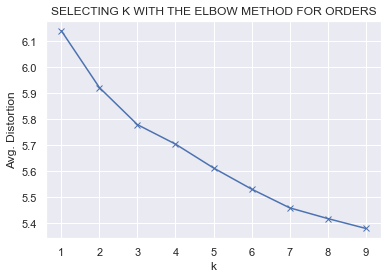

<IPython.core.display.Javascript object>

In [39]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters = range(1, 10)
meanDistortions_orders = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(orders_scaled)
    prediction = model.predict(orders_scaled)
    meanDistortions_orders.append(
        sum(
            np.min(cdist(orders_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / orders_scaled.shape[0]
    )

plt.plot(clusters, meanDistortions_orders, "bx-")
plt.xlabel("k")
plt.ylabel("Avg. Distortion")
plt.title("SELECTING K WITH THE ELBOW METHOD FOR ORDERS")


Text(0.5, 1.0, 'SELECTING K WITH THE ELBOW METHOD FOR RETURNS')

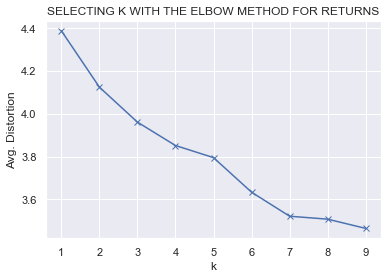

<IPython.core.display.Javascript object>

In [40]:
clusters = range(1, 10)
meanDistortions_returns = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(returns_scaled)
    prediction = model.predict(returns_scaled)
    meanDistortions_returns.append(
        sum(
            np.min(cdist(returns_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / returns_scaled.shape[0]
    )

plt.plot(clusters, meanDistortions_returns, "bx-")
plt.xlabel("k")
plt.ylabel("Avg. Distortion")
plt.title("SELECTING K WITH THE ELBOW METHOD FOR RETURNS")


<a id='section_id'></a>
<h3 style="color:blue">Create Dictionaries to Retrieve Information about the Models</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
created several dictionaries: models, distance_spaces, labels, centers, inertia, and distortion. Each of these dictionaries is used to store different pieces of information about each k-means model that you've created.
</p>
<ol>
<li>
<b>Models:</b>
<p>stores the actual k-means models themselves. Each key in the dictionary is a string that represents the name of the model (e.g., "orders_cleaned_k3"), and the value is the corresponding k-means model.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>distance_spaces:</b>
<p> stores the "distance space" of each model. The distance space is a measure of how far each data point is from each cluster center. This can be useful for understanding the spread of data within each cluster.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>labels:</b>
<p>  stores the labels for each data point. The labels tell you which cluster each data point was assigned to..</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>labels:</b>
<p>  stores the labels for each data point. The labels tell you which cluster each data point was assigned to..</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>centers:</b>
<p>   stores the inertia for each model. Inertia is a measure of how far the data points in a cluster are. It is used as a metric to estimate the quality of the clusters. Lower values are better..</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<li>
<b>distortion:</b>
<p>   stores the distortion for each model. Distortion is another measure of the quality of the clusters. It is calculated as the average distance of all data points to their respective cluster centers. Like inertia, lower values are better.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


<div style="border-top: 3px solid black"></div>  

<a id=kmeans></a>

<h3 style="color:blue">K-Means Clustering K=3 Model, K=4 Model, K=5 Model</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
The models are trained on the scaled data because KMeans is a distance-based algorithm, and it's a good practice to use scaled data. However, the resulting cluster labels are added to the original non-scaled dataframes as well as the scaled dataframes to examine the cluster assignments in the context of both the original and the standardized data. The steps of copying, assigning, instantiating, fitting, predicting, and appending are repeated for each number of clusters (k=3, k=4, k=5) for both the orders and returns datasets.
</p>

<ol>
<li>
<b>Copy :</b>
<p>Create copies of the data frames. The data frames that are copied include:</p>
<ul>
    <li>orders_scaled</li>
    <li>orders_cleaned</li>
    <li>returns_scaled</li>
    <li>returns_cleaned</li>
</ul>
</li>

<p></p>

<li>
<b>Assign :</b>
<p>Assign the copies to their corresponding names. The names are formed by appending '_kn' to the original data frame name, where n is the number of clusters.</p>
<ul>
    <li>'orders_scaled_kn'</li>
    <li>'orders_cleaned_kn'</li>
    <li>'returns_scaled_kn'</li>
    <li>'returns_cleaned_kn'</li>
</ul>
</li>

<p></p>

<li>
<b>Instantiate :</b>
<p>Instantiate a KMeans clustering model with n clusters. The models are named by appending '_model_kn' to the corresponding data frame name.</p>
<ul>
    <li>'orders_scaled_kn_model_kn'</li>
    <li>'orders_cleaned_kn_model_kn'</li>
    <li>'returns_scaled_kn_model_kn'</li>
    <li>'returns_cleaned_kn_model_kn'</li>
</ul>
</li>

<p></p>

<li>
<b>Fit :</b>
<p>Fit the instantiated KMeans clustering model on the scaled data. The data used for fitting includes:</p>
<ul>
    <li>orders_scaled</li>
    <li>returns_scaled</li>
</ul>
</li>

<p></p>

<li>
<b>Predict :</b>
<p>Predict which group each record will be clustered into, using the corresponding model.</p>
</li>

<p></p>

<li>
<b>Append :</b>
<p>Add a new column named 'Kn_GROUP' to the corresponding data frame, which contains the cluster assignments for each record.</p>
</li>
</ol>

<a href='#top'>🔼</a>


In [41]:
# Initialize an empty dictionary to store the models
models = {}

# Initialize dictionaries for other information
distance_spaces = {}
labels = {}
centers = {}
inertia = {}
distortion = {}
cluster_counts = {} # Store cluster counts

# List of your datasets
datasets = [orders_cleaned, returns_cleaned, orders_scaled, returns_scaled]

# List of names for your datasets
names = ["orders_cleaned", "returns_cleaned", "orders_scaled", "returns_scaled"]

# List of number of clusters
clusters = [3, 4, 5]

# Lists to store dataframes for shape and head display
shape_dfs = []
head_dfs = []

# For each dataset, create a model for each number of clusters
for data, name in zip(datasets, names):
    for k in clusters:
        # Create a unique name for each model
        model_name = f"{name}_k{k}"
        
        # Instantiate and fit the model
        model = KMeans(n_clusters=k)
        model.fit(data)
        
        # Store the model in the dictionary
        models[model_name] = model

        # Compute and store distance space, labels, and centers
        distance_spaces[model_name] = model.transform(data)
        labels[model_name] = model.labels_
        centers[model_name] = model.cluster_centers_

        # Compute and store Inertia and Distortion
        inertia[model_name] = model.inertia_
        distortion[model_name] = sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
        
        # Compute and store cluster count
        cluster_counts[model_name] = len(set(labels[model_name]))
        
        # Create a copy of the dataset and add the labels
        data_copy = data.copy()
        data_copy[f"K{k}_GROUP"] = labels[model_name]
        
        # Store dataframe for shape and head display
        shape_dfs.append(pd.DataFrame({"Shape": [data_copy.shape]}, index=[model_name]))
        head_dfs.append(data_copy)


# Now use the dictionaries to access the information for each model


<IPython.core.display.Javascript object>

In [43]:
# Store the model names
model_names = list(models.keys())

# Create a list to hold the shape dataframes with the model names
shape_dfs_with_names = []

# Loop through shape_dfs and model_names and create a new dataframe with the model name as the index
for df, name in zip(shape_dfs, model_names):
    df_with_name = df.copy()
    df_with_name.index = [name]
    shape_dfs_with_names.append(df_with_name)

# Display shapes
display_side_by_side(*shape_dfs_with_names)


,Shape
orders_cleaned_k3,"(24059, 44)"
,Shape
orders_cleaned_k4,"(24059, 44)"
,Shape
orders_cleaned_k5,"(24059, 44)"
,Shape
returns_cleaned_k3,"(1208, 24)"
,Shape
returns_cleaned_k4,"(1208, 24)"
,Shape


<IPython.core.display.Javascript object>

In [45]:
# Store the model names
model_names = list(models.keys())

# Create a list to hold the head dataframes with the model names
head_dfs_with_names = []

# Loop through head_dfs and model_names and create a new dataframe with the model name as the index
for df, name in zip(head_dfs, model_names):
    df_with_name = df.head(5).copy()  # Get only the first 5 rows
    df_with_name.index = [name]*len(df_with_name)
    head_dfs_with_names.append(df_with_name)

# Display heads
display_side_by_side(*head_dfs_with_names)


,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Order_Month_April,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_March,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September,Ship_Mode_First Class,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Orders_Category_Furniture,Orders_Category_Office Supplies,Orders_Category_Technology,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Michigan,State_Minnesota,State_Missouri,State_Nebraska,State_North Dakota,State_Oklahoma,State_South Dakota,State_Texas,State_Wisconsin,Segment_Consumer,Segment_Corporate,Segment_Home Office,K3_GROUP
orders_cleaned_k3,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
orders_cleaned_k3,11.43,3.43,0.33,0.096210,1,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
orders_cleaned_k3,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
orders_cleaned_k3,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
orders_cleaned_k3,141.60,42.48,0.28,0.006591,1,0.35,1,1488,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Order_Month_April,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_March,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September,Ship_Mode_First Class,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Orders_Category_Furniture,Orders_Category_Office Supplies,Orders_Category_Technology,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Michigan,State_Minnesota,State_Missouri,State_Nebraska,State_North Dakota,State_Oklahoma,State_South Dakota,State_Texas,State_Wisconsin,Segment_Consumer,Segment_Corporate,Segment_Home Office,K4_GROUP
orders_cleaned_k4,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
orders_cleaned_k4,11.43,3.43,0.33,0.096210,1,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
orders_cleaned_k4,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
orders_cleaned_k4,23.95,95.80,0.33,0.003445,4,0.40,1,1488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  


<a id='distance_spaces'></a>
<h3 style="color:blue">Cluster Distance Space</h3>
<hr>
<h4 style="color:orange">OBSERVATION</h4>
<p style="font-size:15px">
In this code, cdist is a function from scipy.spatial.distance that computes the distance between each pair of two collections of inputs. It is import it with from scipy.spatial.distance import cdist at the top of your file if you haven't already.
</p>
<ol>
<li>
<b>Distance Space:</b>
<p>The sklearn KMeans object has a method called transform that returns the distance between each observation and each cluster centroid. Each KMeans model will transform the dataframe on which it was trained. Each row in the returned array corresponds to an observation in the data, and each column corresponds to a cluster. The value at a specific position in the array represents the distance between that observation and the cluster centroid.

For instance, 3 clusters and 5 observations, the transform method would return a 5x3 array. Each row corresponds to an observation and each column to a cluster. The value at [2,1] would represent the distance between the third observation and the second cluster.

In examining distances, smaller values are preferable as they indicate that an observation is closer to its own cluster's centroid. Similar distances to multiple centroids may suggest less distinct clustering; in such a case, consider revisiting the number of clusters or the features used for clustering.</p>
<ul>
    <li>Item 1</li>
    <li>Item 2</li>
    <li>Item 3</li>
    <li>Item 4</li>
</ul>
</li>
<p></p>
<!-- Add as many list items as you need -->
</ol>
<a href='#top'>🔼</a>


In [13]:
# This code loops over all the model names stored in model_names,
# which is simply a list of the keys in the models dictionary.
# For each model name, it prints the corresponding distance space (.transform).

# Distance Space


model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the Distance Spaces
    print(f"Distance Spaces for {name}:")
    print(distance_spaces[name])
    print()  # Newline for readability

Distance Spaces for orders_cleaned_k3:
[[  25.32063445 3037.75116049  849.25197852]
 [ 112.59435719 3130.96685729  941.8791279 ]
 [  25.32269498 3037.75117099  849.25204781]
 ...
 [ 117.05905405 3134.24220015  945.85132266]
 [  77.94715559 3094.63103247  906.09162926]
 [  77.94230476 3094.63091258  906.09121402]]

Distance Spaces for orders_cleaned_k4:
[[   17.19465546   681.85711829 10092.60314858  2268.13110574]
 [  100.95531017   774.26170417 10185.63870802  2361.32725422]
 [   17.19765964   681.85720721 10092.60314858  2268.13112591]
 ...
 [  105.43233939   778.35219108 10189.22412031  2364.69998728]
 [   66.43363838   738.61442427 10149.50900148  2325.04318187]
 [   66.42793928   738.61392068 10149.50897116  2325.04301742]]

Distance Spaces for orders_cleaned_k5:
[[  489.99155066    15.70797088  1425.87918959 10092.60314858
   3080.68789284]
 [  581.90872003    84.96590256  1518.91363334 10185.63870802
   3173.90651041]
 [  489.99166586    15.71128342  1425.87923136 10092.60314858

<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Labels and Cluster Centers</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
The .labels_ attribute returns an array where the ith index represents the cluster label of the ith instance in the dataset. The cluster labels are the predicted clusters for each observation in your dataset.
    
The .cluster_centers_ attribute returns an array where the ith index is a coordinate array representing the centroid of the ith cluster. These are the coordinates for the center of each cluster.

Examining the labels and the cluster centers reveals insights into the structure and distribution of the data points within each cluster. The labels show how the data points are grouped, providing a sense of the distinct categories or groups within the data. The cluster centers represent the "average" or "typical" data point within each cluster, offering understanding about the characteristics of each group.

For instance, in a customer segmentation scenario, the labels reveal the number of customers in each segment, while the cluster centers provide information about the typical behavior or characteristics of customers within each segment.    
    
<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>

In [14]:
# This code loops over all the model names stored in model_names, 
# which is simply a list of the keys in the models dictionary. 
# For each model name, it prints the corresponding labels and centers. 

# Labels and Centers
model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the labels
    print(f"Labels for {name}:")
    print(labels[name])
    print()  # Newline

    # Print the centers
    print(f"Centers for {name}:")
    print(centers[name])
    print()  # Newline


Labels for orders_cleaned_k3:
[0 0 0 ... 0 0 0]

Centers for orders_cleaned_k3:
[[ 4.39250799e+01  1.11197284e+02  4.94419417e-01  9.06338829e-03
   3.23916786e+00  2.48003348e-01  4.52462936e-01  1.48800000e+03
   5.63845050e-02  9.56480153e-02  1.16164515e-01  4.10329986e-02
   4.80631277e-02  8.33094213e-02  7.83835485e-02  5.33237685e-02
   6.93926351e-02  1.30224773e-01  1.17455763e-01  1.10616930e-01
   5.33715925e-02  2.40554758e-01  3.51889048e-01  3.54184601e-01
   1.65471066e-01  6.74844572e-01  1.59684362e-01  2.14347202e-01
   6.72883788e-02  1.51123864e-02  9.18220947e-03  1.02247728e-01
   3.66810139e-02  2.82161645e-02  1.91774271e-02  4.97369680e-03
   3.18029651e-02  5.93017695e-03  4.14777618e-01  5.02630320e-02
   5.10090866e-01  2.91630799e-01  1.98278336e-01]
 [ 4.57480551e+02  3.10245417e+03  9.18956522e-01  3.21528197e-03
   7.11884058e+00  3.67536232e-01  6.57971014e-01  1.48800000e+03
   5.50724638e-02  1.10144928e-01  1.07246377e-01  4.34782609e-02
   5.217391

<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Cluster Counter</h3>

<hr>

<h4 style="color:orange">OBSERVATIONS</h4>

<p style="font-size:15px">
Print the size of each cluster (i.e., the number of data points assigned to each cluster) for each model and data frame. The keys in the resulting Counter objects represent the cluster labels, and the values represent the number of data points assigned to each cluster.

Examining the cluster sizes can provide insights about the distribution of the data points across the clusters. For example, if the data points are evenly distributed across the clusters, this might suggest that the clustering is robust. On the other hand, if a few clusters contain the majority of the data points, this might suggest that the clustering is skewed and perhaps the number of clusters or the features used for clustering could be reevaluated.

<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [15]:
# This code loops over all the model names stored in model_names,
# which is simply a list of the keys in the models dictionary.
# For each model name, it prints the corresponding count (size) of each cluster.

# List of all model names
model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the Cluster Counter
    print(f"Cluster Counter for {name}:")
    print(np.bincount(labels[name]))
    print()  # Newline

Cluster Counter for orders_cleaned_k3:
[20910   345  2804]

Cluster Counter for orders_cleaned_k4:
[20267  3167    13   612]

Cluster Counter for orders_cleaned_k5:
[ 3684 19178   958    13   226]

Cluster Counter for returns_cleaned_k3:
[960  55 193]

Cluster Counter for returns_cleaned_k4:
[883  99  27 199]

Cluster Counter for returns_cleaned_k5:
[859  42  94 200  13]

Cluster Counter for orders_scaled_k3:
[7335 8496 8228]

Cluster Counter for orders_scaled_k4:
[ 892 7910 7082 8175]

Cluster Counter for orders_scaled_k5:
[1154 4458 6224 7805 4418]

Cluster Counter for returns_scaled_k3:
[ 99 646 463]

Cluster Counter for returns_scaled_k4:
[ 99 244 218 647]

Cluster Counter for returns_scaled_k5:
[359 410  93 190 156]



<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Intertia and Distortion</h3>

<hr>

<h4 style="color:orange">Intertia and Distortion</h4>

<p style="font-size:15px">
Correct understanding of Inertia and Distortion in the context of K-means clustering.

Inertia describes the sum of the squared distances between each training instance and its closest centroid. It acts as a metric that measures how internally coherent clusters are. K-means algorithm tries to minimize the inertia when choosing the optimal number of clusters.

Distortion, on the other hand, measures the sum of the squared distances between each data point and the centroid of its assigned cluster. This is an indication of how far, on average, data points are from their cluster center. A lower distortion indicates that data points are, on average, closer to their centroids, hence better clustered.
    
This distortion metric is useful because it gives us an idea of how "tight" or well-defined our clusters are. The lower the distortion, the closer each data point is to the center of its cluster, meaning the clusters are more compact. Conversely, high distortion means the data points are more spread out from their cluster centers, indicating less well-defined clusters.

This metric can be particularly important when determining the optimal number of clusters (k) in your data. The Elbow Method is a common technique that uses this concept. You compute the distortion for different values of k and plot them. The "elbow" of the plot, where the rate of decrease sharply shifts, can be a good choice for k as it indicates the point where adding more clusters doesn't significantly improve the compactness.

<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [16]:
# This code loops over all the model names stored in model_names,
# which is simply a list of the keys in the models dictionary.
# For each model name, it prints the corresponding intertia and distortion.

# List of all model names
model_names = list(models.keys())

# For each model name
for name in model_names:
    # Print the Inertia
    print(f"Inertia for {name}:")
    print(inertia[name])
    print()  # Newline for readability

    # Print the Distortion
    print(f"Distortion for {name}:")
    print(distortion[name])
    print()  # Newline for readability

Inertia for orders_cleaned_k3:
1828789804.7273324

Distortion for orders_cleaned_k3:
144.28928408643506

Inertia for orders_cleaned_k4:
1097163238.8439624

Distortion for orders_cleaned_k4:
129.7063014911631

Inertia for orders_cleaned_k5:
743908746.2968104

Distortion for orders_cleaned_k5:
110.23775470290748

Inertia for returns_cleaned_k3:
114639834.49084213

Distortion for returns_cleaned_k3:
201.39944362524147

Inertia for returns_cleaned_k4:
70893320.36562417

Distortion for returns_cleaned_k4:
159.2742707041677

Inertia for returns_cleaned_k5:
45709856.8044944

Distortion for returns_cleaned_k5:
139.2113978843987

Inertia for orders_scaled_k3:
911312.7180713498

Distortion for orders_scaled_k3:
5.779856514515139

Inertia for orders_scaled_k4:
889525.0172226204

Distortion for orders_scaled_k4:
5.70416282669725

Inertia for orders_scaled_k5:
866881.5387672174

Distortion for orders_scaled_k5:
5.61234816732915

Inertia for returns_scaled_k3:
23979.509984205684

Distortion for retu

<IPython.core.display.Javascript object>

Number of Clusters: 3 	Average Distortion: 88.83176306875278
Number of Clusters: 4 	Average Distortion: 74.74095353961525
Number of Clusters: 5 	Average Distortion: 64.74842514438672


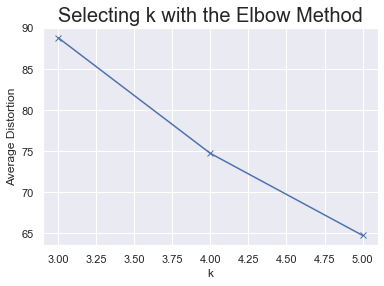

<IPython.core.display.Javascript object>

In [46]:
import matplotlib.pyplot as plt

# Separate distortions by number of clusters
distortions_by_k = {k: [] for k in clusters}
for model_name, dist in distortion.items():
    _, k_str = model_name.rsplit('_k', 1)
    k = int(k_str)
    distortions_by_k[k].append(dist)

# Calculate the mean distortion for each number of clusters
mean_distortions = {k: sum(dist_list) / len(dist_list) for k, dist_list in distortions_by_k.items()}

# Print and plot mean distortions
for k, mean_dist in mean_distortions.items():
    print("Number of Clusters:", k, "\tAverage Distortion:", mean_dist)

plt.plot(list(mean_distortions.keys()), list(mean_distortions.values()), "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()


In [48]:
# K=4 PROFILE
# The names of the models we're interested in
model_names = ["orders_cleaned_k4", "returns_cleaned_k4", "orders_scaled_k4", "returns_scaled_k4"]

for model_name in model_names:
    print(f"\nModel: {model_name}")
    
    # Get the labels for this model
    label = labels[model_name]
    
    # Get the name of the original dataset
    data_name = model_name.rsplit('_k', 1)[0]
    
    # Find the original dataset
    for name, data in zip(names, datasets):
        if name == data_name:
            break
    else:
        print(f"Could not find dataset for {model_name}")
        continue
    
    # Add the labels to a copy of the data
    data_with_labels = data.copy()
    data_with_labels['GROUP'] = label
    
    # Group the data by the labels and print out some statistics for each group
    grouped = data_with_labels.groupby('GROUP')
    for name, group in grouped:
        print(f"\nGroup {name}")
        print(group.describe())



Model: orders_cleaned_k4

Group 0
          Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
count  20260.000000  20260.000000   20260.000000          20260.000000   
mean      40.366286     99.986824       0.460497              0.009241   
std       51.348749     99.901350       9.980125              0.304427   
min        0.420000      0.440000    -426.990000             -2.747212   
25%       10.320000     25.080000       0.100000              0.000758   
50%       22.230000     59.940000       0.190000              0.002263   
75%       49.230000    145.745000       0.290000              0.006661   
max      651.480000    447.840000     468.960000             41.245383   

       Orders_Quantity      Discount  Discount_Over_30  Region_ID  \
count     20260.000000  20260.000000      20260.000000    20260.0   
mean          3.213722      0.245368          0.448124     1488.0   
std           2.145097      0.131366          0.497314        0.0   
min           1.000000

         Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
count  3173.000000   3173.000000    3173.000000           3173.000000   
mean    209.803996    750.806001       3.885531              0.005127   
std     133.043165    282.549239      43.144418              0.058031   
min       1.540000    325.060000    -447.180000             -0.640028   
25%     115.530000    524.180000       0.190000              0.000226   
50%     173.940000    664.770000       0.280000              0.000369   
75%     266.610000    914.340000       0.380000              0.000570   
max    1039.990000   1539.360000     754.700000              1.632313   

       Orders_Quantity     Discount  Discount_Over_30  Region_ID  \
count      3173.000000  3173.000000       3173.000000     3173.0   
mean          4.439332     0.333659          0.600693     1488.0   
std           2.411326     0.134374          0.489833        0.0   
min           1.000000     0.000000          0.000000     1488.0   
25

       Returns_Sales  Returns_Profit  Returns_Profit_Margin  \
count     201.000000      201.000000             201.000000   
mean      758.683433      196.238363               0.265373   
std       235.300343      110.513734               0.126823   
min       448.800000        0.000000               0.000000   
25%       545.920000      109.694400               0.190000   
50%       735.660000      170.459100               0.280000   
75%       892.220000      267.182400               0.380000   
max      1401.840000      507.589200               0.470000   

       Returns_Category_Furniture  Returns_Category_Office Supplies  \
count                  201.000000                        201.000000   
mean                     0.323383                          0.164179   
std                      0.468935                          0.371363   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%   

         Unit_Cost  Orders_Sales  Orders_Profit  Orders_Profit_Margin  \
count  4692.000000   4692.000000    4692.000000           4692.000000   
mean      0.606639      0.481800       0.034425             -0.009884   
std       1.468637      1.519665       1.836309              0.244743   
min      -0.616193     -0.491871     -99.173797             -7.168006   
25%      -0.219712     -0.247326      -0.022368             -0.029539   
50%       0.259337      0.034142      -0.020045             -0.027949   
75%       0.880792      0.609164      -0.016430             -0.024336   
max      23.484345     27.372197      37.141763              5.078556   

       Orders_Quantity     Discount  Discount_Over_30  Region_ID  \
count      4692.000000  4692.000000       4692.000000     4692.0   
mean          0.006859     0.195547          0.014121        0.0   
std           0.998132     1.041728          1.000767        0.0   
min          -1.074842    -1.907156         -0.947627        0.0   
25

       Returns_Sales  Returns_Profit  Returns_Profit_Margin  \
count     186.000000      186.000000             186.000000   
mean       -0.202795       -0.249008              -0.005165   
std         0.496228        0.368133               0.755840   
min        -0.606286       -0.502828              -1.293266   
25%        -0.535874       -0.464550              -0.653208   
50%        -0.412713       -0.387898               0.242874   
75%        -0.114702       -0.210535               0.562903   
max         1.940873        1.798193               2.291061   

       Returns_Category_Furniture  Returns_Category_Office Supplies  \
count                  186.000000                        186.000000   
mean                    -0.000433                         -0.036444   
std                      1.002398                          1.009355   
min                     -0.523700                         -1.220951   
25%                     -0.523700                         -1.220951   
50%   

<IPython.core.display.Javascript object>

In [50]:
orders_scaled.columns


Index(['Unit_Cost', 'Orders_Sales', 'Orders_Profit', 'Orders_Profit_Margin',
       'Orders_Quantity', 'Discount', 'Discount_Over_30', 'Region_ID',
       'Order_Month_April', 'Order_Month_August', 'Order_Month_December',
       'Order_Month_February', 'Order_Month_January', 'Order_Month_July',
       'Order_Month_June', 'Order_Month_March', 'Order_Month_May',
       'Order_Month_November', 'Order_Month_October', 'Order_Month_September',
       'Ship_Mode_First Class', 'Ship_Mode_Same Day', 'Ship_Mode_Second Class',
       'Ship_Mode_Standard Class', 'Orders_Category_Furniture',
       'Orders_Category_Office Supplies', 'Orders_Category_Technology',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Michigan', 'State_Minnesota', 'State_Missouri', 'State_Nebraska',
       'State_North Dakota', 'State_Oklahoma', 'State_South Dakota',
       'State_Texas', 'State_Wisconsin', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office'],
      dt

<IPython.core.display.Javascript object>

In [51]:
returns_scaled.columns


Index(['Returns_Sales', 'Returns_Profit', 'Returns_Profit_Margin',
       'Returns_Category_Furniture', 'Returns_Category_Office Supplies',
       'Returns_Category_Technology', 'State_Illinois', 'State_Indiana',
       'State_Iowa', 'State_Kansas', 'State_Michigan', 'State_Minnesota',
       'State_Missouri', 'State_Nebraska', 'State_North Dakota',
       'State_Oklahoma', 'State_South Dakota', 'State_Texas',
       'State_Wisconsin', 'Reason_Returned_Not Given',
       'Reason_Returned_Not Needed', 'Reason_Returned_Wrong Color',
       'Reason_Returned_Wrong Item'],
      dtype='object')

<IPython.core.display.Javascript object>